In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns

In [59]:
df = pd.read_csv('Mall_Customers.csv')

In [60]:
df = df.rename(columns = {'Spending Score':'spend'})

<AxesSubplot:>

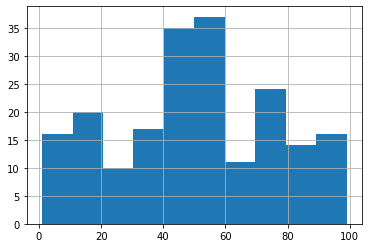

In [61]:
df.spend.hist()

In [38]:
def norm_conf_int(alpha, mean, std, margin=5):
    plt.figure(figsize=(10,5))
    xs= np.linspace(mean - margin, mean + margin )
    pdf = stats.norm(mean, std).pdf(xs)
    
    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)
    
    left, right = stats.norm.interval(1-alpha, loc=mean, scale=std)
    
    for i in [left, right]:
        ymax=plt.ylim()[1]
        plt.axvline(i, color='blue', linestyle='dashed', lw=2)
        
        if i == left:
            xq=np.linspace(mean - margin, left)
        else:
            xq = np.linspace(right, mean + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*ymax, round(i,2), color='blue')
        yq = stats.norm(mean, std).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)
    
    return left, right
    

In [62]:
norm = stats.norm()

alpha = 0.05
z_crit = norm.ppf(1-alpha/2)

mu = df.spend.mean()
var = df.spend.var(ddof=1)
n = df.spend.count()

left = mu-z_crit*np.sqrt(var/n)
right = mu+z_crit*np.sqrt(var/n)

In [63]:
n

200

In [21]:
right

53.7788917438371

In [64]:
mu = df.spend.mean()
sd = df.spend.std(ddof=1)/np.sqrt(n)

stats.norm.interval(0.95, loc=mu, scale=sd)

(46.621108256162906, 53.7788917438371)

In [66]:
df.spend.std(ddof=1)

25.823521668370162

In [55]:
df.spend.std(ddof=1)

25.823521668370162

(46.621108256162906, 53.7788917438371)

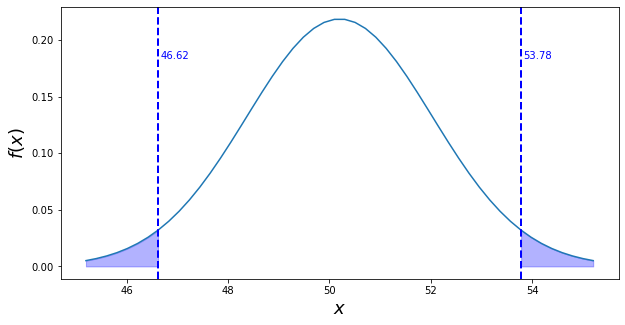

In [39]:
norm_conf_int(alpha, mu, sd, margin=5)

In [98]:
a = df.spend.sample(50)

In [99]:
mu = a.mean()
var = a.var(ddof=1)
se = a.std(ddof=1)/np.sqrt(n)
n = a.count()

In [100]:
sd

8.597480251019286

<AxesSubplot:>

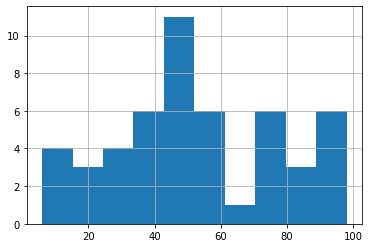

In [101]:
a.hist()

In [102]:
stats.t.interval(0.95, df=n-1, loc=mu, scale=se) 

(36.89809126171231, 68.7819087382877)

In [103]:
stats.norm.interval(0.95, loc=mu, scale=sd)

(35.989248350207816, 69.69075164979219)